<a href="https://colab.research.google.com/github/Spoiler-xl/climate-model/blob/main/security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import joblib

# LOADING DATASET

In [2]:
data = pd.read_csv('/content/qzvin_hourly_data.csv')

# DATA EXPLORATION

In [3]:
#see the first five rows
data.head()

date  temperature_2m  relative_humidity_2m  \
0  1999-12-31 20:30:00+00:00          4.9655             54.579082   
1  1999-12-31 21:30:00+00:00          4.7655             54.118652   
2  1999-12-31 22:30:00+00:00          4.5655             53.861824   
3  1999-12-31 23:30:00+00:00          4.2655             54.388763   
4  2000-01-01 00:30:00+00:00          4.0155             54.320557   

   dew_point_2m  apparent_temperature  precipitation  rain  snowfall  \
0       -3.4345              1.918004            0.0   0.0       0.0   
1       -3.7345              1.697024            0.0   0.0       0.0   
2       -3.9845              1.451427            0.0   0.0       0.0   
3       -4.1345              1.112651            0.0   0.0       0.0   
4       -4.3845              0.833469            0.0   0.0       0.0   

   snow_depth  weather_code  ...  direct_radiation  diffuse_radiation  \
0         0.0             0  ...                 0                  0   
1         0.0             0  ...                 0                  0   
2         0.0             0  ...                 0                  0   
3         0.0             0  ...                 0                  0   
4         0.0             0  ...                 0                  0   

   direct_normal_irradiance  global_tilted_irradiance  terrestrial_radiation  \
0                       0.0                       0.0                    0.0   
1                       0.0                       0.0                    0.0   
2                       0.0                       0.0                    0.0   
3                       0.0                       0.0                    0.0   
4                       0.0                       0.0                    0.0   

   shortwave_radiation_instant  diffuse_radiation_instant  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   

   direct_normal_irradiance_instant  global_tilted_irradiance_instant  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   terrestrial_radiation_instant  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  

[5 rows x 42 columns]

In [4]:
#describe the data
data.describe()

temperature_2m  relative_humidity_2m  dew_point_2m  \
count    71082.000000          71082.000000  71082.000000   
mean        11.219583             59.233150      1.636810   
std         11.178613             24.548757      7.902487   
min        -27.284500              3.320742    -31.384499   
25%          2.665500             38.968615     -3.934500   
50%         11.865500             62.309034      1.665500   
75%         19.215500             80.947220      8.115500   
max         38.265500             99.657300     18.515501   

       apparent_temperature  precipitation          rain      snowfall  \
count          71082.000000    71082.00000  71082.000000  71082.000000   
mean               8.648786        0.04951      0.034253      0.011304   
std               12.049190        0.21251      0.178365      0.070998   
min              -31.666310        0.00000      0.000000      0.000000   
25%               -0.785496        0.00000      0.000000      0.000000   
50%                9.493550        0.00000      0.000000      0.000000   
75%               17.586105        0.00000      0.000000      0.000000   
max               37.761610        5.20000      5.200000      2.800000   

         snow_depth  weather_code  pressure_msl  ...  direct_radiation  \
count  71082.000000  71082.000000   71082.00000  ...      71082.000000   
mean       0.022885      7.328649    1015.77007  ...        154.032849   
std        0.062487     18.919498       6.93420  ...        228.709834   
min        0.000000      0.000000     994.10000  ...          0.000000   
25%        0.000000      0.000000    1010.70000  ...          0.000000   
50%        0.000000      1.000000    1015.20000  ...          1.000000   
75%        0.000000      2.000000    1020.40000  ...        277.000000   
max        0.440000     75.000000    1042.40000  ...        855.000000   

       diffuse_radiation  direct_normal_irradiance  global_tilted_irradiance  \
count       71082.000000              71082.000000              71081.000000   
mean           61.680918                255.567192                215.715367   
std            77.022778                317.809083                291.605536   
min             0.000000                  0.000000                  0.000000   
25%             0.000000                  0.000000                  0.000000   
50%             7.000000                 12.459037                  9.000000   
75%           122.000000                563.592450                424.000000   
max           470.000000                998.797900               1010.000000   

       terrestrial_radiation  shortwave_radiation_instant  \
count           71081.000000                 71081.000000   
mean              345.147564                   215.400160   
std               425.908097                   293.234185   
min                 0.000000                     0.000000   
25%                 0.000000                     0.000000   
50%                53.840614                     0.000000   
75%               709.174560                   421.547800   
max              1289.100500                  1010.180500   

       diffuse_radiation_instant  direct_normal_irradiance_instant  \
count               71081.000000                      71081.000000   
mean                   61.449448                        253.940074   
std                    77.451461                        319.039822   
min                     0.000000                          0.000000   
25%                     0.000000                          0.000000   
50%                     0.000000                          0.000000   
75%                   123.566610                        563.666140   
max                   458.274700                        998.797800   

       global_tilted_irradiance_instant  terrestrial_radiation_instant  
count                      71081.000000                   71081.000000  
mean                         214.600100                     344.040299  
st

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71082 entries, 0 to 71081
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              71082 non-null  object 
 1   temperature_2m                    71082 non-null  float64
 2   relative_humidity_2m              71082 non-null  float64
 3   dew_point_2m                      71082 non-null  float64
 4   apparent_temperature              71082 non-null  float64
 5   precipitation                     71082 non-null  float64
 6   rain                              71082 non-null  float64
 7   snowfall                          71082 non-null  float64
 8   snow_depth                        71082 non-null  float64
 9   weather_code                      71082 non-null  int64  
 10  pressure_msl                      71082 non-null  float64
 11  surface_pressure                  71082 non-null  float64
 12  clou

In [6]:
data.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'shortwave_radiation', 'direct_radiation',
       'diffuse_radiation', 'direct_normal_irradiance',
       'global_tilted_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'diffuse_radiation_instant',
       'direct_normal_irradiance_insta

# DATA WRANGLING AND PRE-PROCESSING

# Checking for missing values

In [7]:
data.isnull().sum()

date                                0
temperature_2m                      0
relative_humidity_2m                0
dew_point_2m                        0
apparent_temperature                0
precipitation                       0
rain                                0
snowfall                            0
snow_depth                          0
weather_code                        0
pressure_msl                        0
surface_pressure                    0
cloud_cover                         0
cloud_cover_low                     0
cloud_cover_mid                     0
cloud_cover_high                    0
et0_fao_evapotranspiration          0
vapour_pressure_deficit             0
wind_speed_10m                      0
wind_speed_100m                     0
wind_direction_10m                  0
wind_direction_100m                 0
wind_gusts_10m                      0
soil_temperature_0_to_7cm           0
soil_temperature_7_to_28cm          0
soil_temperature_28_to_100cm        0
soil_temperature_100_to_255cm       0
soil_moisture_0_to_7cm              0
soil_moisture_7_to_28cm             0
soil_moisture_28_to_100cm           0
soil_moisture_100_to_255cm          0
shortwave_radiation                 0
direct_radiation                    0
diffuse_radiation                   0
direct_normal_irradiance            0
global_tilted_irradiance            1
terrestrial_radiation               1
shortwave_radiation_instant         1
diffuse_radiation_instant           1
direct_normal_irradiance_instant    1
global_tilted_irradiance_instant    1
terrestrial_radiation_instant       1
dtype: int64

In [8]:
data.dtypes

date                                 object
temperature_2m                      float64
relative_humidity_2m                float64
dew_point_2m                        float64
apparent_temperature                float64
precipitation                       float64
rain                                float64
snowfall                            float64
snow_depth                          float64
weather_code                          int64
pressure_msl                        float64
surface_pressure                    float64
cloud_cover                         float64
cloud_cover_low                       int64
cloud_cover_mid                       int64
cloud_cover_high                      int64
et0_fao_evapotranspiration          float64
vapour_pressure_deficit             float64
wind_speed_10m                      float64
wind_speed_100m                     float64
wind_direction_10m                  float64
wind_direction_100m                 float64
wind_gusts_10m                      float64
soil_temperature_0_to_7cm           float64
soil_temperature_7_to_28cm          float64
soil_temperature_28_to_100cm        float64
soil_temperature_100_to_255cm       float64
soil_moisture_0_to_7cm              float64
soil_moisture_7_to_28cm             float64
soil_moisture_28_to_100cm           float64
soil_moisture_100_to_255cm          float64
shortwave_radiation                   int64
direct_radiation                      int64
diffuse_radiation                     int64
direct_normal_irradiance            float64
global_tilted_irradiance            float64
terrestrial_radiation               float64
shortwave_radiation_instant         float64
diffuse_radiation_instant           float64
direct_normal_irradiance_instant    float64
global_tilted_irradiance_instant    float64
terrestrial_radiation_instant       float64
dtype: object

# FEATURE ENGINEERING

In [9]:
# Select relevant features for prediction
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]
target = "temperature_2m"


In [10]:
data[features].head()

relative_humidity_2m  dew_point_2m  apparent_temperature  pressure_msl  \
0             54.579082       -3.4345              1.918004        1022.7   
1             54.118652       -3.7345              1.697024        1023.0   
2             53.861824       -3.9845              1.451427        1023.0   
3             54.388763       -4.1345              1.112651        1022.9   
4             54.320557       -4.3845              0.833469        1022.6   

   wind_speed_10m  
0        3.075841  
1        2.968636  
2        3.075841  
3        3.219938  
4        3.219938

# VISUALIZATION

In [11]:
!pip install plotly seaborn

In [12]:
#importing libraries
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# histogram

In [13]:
# Features list
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]

# Plotly Histograms
for feature in features:
    fig = px.histogram(data, x=feature, nbins=40,
                       title=f'Distribution of {feature}',
                       color_discrete_sequence=['indianred'])
    fig.update_layout(title_font_color='darkblue', title_font_size=20)
    fig.show()

# boxplot

In [14]:
for feature in features:
    fig = px.box(data, y=feature,
                 title=f'Boxplot of {feature}',
                 color_discrete_sequence=['mediumseagreen'])
    fig.update_layout(title_font_color='darkgreen', title_font_size=20)
    fig.show()

# heatmap

In [15]:
# Compute correlation
corr_matrix = data[features].corr().round(2)

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=features,
    y=features,
    annotation_text=corr_matrix.values,
    colorscale='Viridis'
)
fig.update_layout(title='Interactive Correlation Heatmap', title_font_size=20)
fig.show()


# DASHBOARD

In [16]:
#Requred to be installed for dashboard
!pip install jupyter-dash plotly pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [17]:
#importing libraries
import plotly.express as px
 #for running dash in notebook
from dash import dcc, html, Input, Output #dash components

In [18]:
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]

In [19]:
# Ensure the 'date' column is in string format before using .str methods
data['date'] = data['date'].astype(str)

# Now remove any trailing '+' characters
data['date_cleaned'] = data['date'].str.rstrip('+')

# Convert cleaned date strings to datetime format
data['date_cleaned'] = pd.to_datetime(data['date_cleaned'], errors='coerce')

# Check if any dates failed to parse
invalid_dates = data[data['date_cleaned'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")

# Drop rows with invalid dates
data = data.dropna(subset=['date_cleaned'])

# Rename cleaned date back to 'date'
data['date'] = data['date_cleaned']
data.drop(columns='date_cleaned', inplace=True)

# Extract year
data['year'] = data['date'].dt.year

# Preview cleaned data
print(data[['date', 'year']].head())


Number of invalid dates: 0
                       date  year
0 1999-12-31 20:30:00+00:00  1999
1 1999-12-31 21:30:00+00:00  1999
2 1999-12-31 22:30:00+00:00  1999
3 1999-12-31 23:30:00+00:00  1999
4 2000-01-01 00:30:00+00:00  2000


In [20]:
print(data[['date', 'year']].head())

                       date  year
0 1999-12-31 20:30:00+00:00  1999
1 1999-12-31 21:30:00+00:00  1999
2 1999-12-31 22:30:00+00:00  1999
3 1999-12-31 23:30:00+00:00  1999
4 2000-01-01 00:30:00+00:00  2000


In [21]:
!pip install dash

In [22]:
import dash

In [23]:
# Extract unique years for dropdown
available_years = sorted(data['year'].unique())

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Weather Feature Dashboard"

# Dash layout with dropdown and graph
app.layout = html.Div(
    style={'backgroundColor': '#f9f9f9', 'padding': '20px'},
    children=[
        html.H1("Weather Feature Dashboard", style={'textAlign': 'center', 'color': '#2c3e50'}),

        html.Div([
            html.Label("Select Year:", style={'fontSize': 18, 'color': '#34495e'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(year), 'value': year} for year in available_years],
                value=available_years[0],
                style={'width': '50%', 'marginBottom': '20px'}
            )
        ], style={'textAlign': 'center'}),

        dcc.Graph(id='feature-graph')
    ]
)

In [24]:
# Callback to update graph based on selected year
@app.callback(
    Output('feature-graph', 'figure'),
    Input('year-dropdown', 'value')
)
def update_graph(selected_year):
    # Filter data by selected year
    filtered_data = data[data['year'] == selected_year]

    # Create interactive line plot for all features over time
    fig = px.line(
        filtered_data,
        x='date',
        y=["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"],
        labels={'value': 'Feature Value', 'date': 'Date'},
        title=f"Weather Features in {selected_year}",
        color_discrete_sequence=px.colors.qualitative.Pastel  # Custom colors
    )

    fig.update_layout(
        plot_bgcolor='#ffffff',
        paper_bgcolor='#f9f9f9',
        font=dict(color='#2c3e50'),
        title_font=dict(size=22),
        hovermode='x unified'
    )

    return fig

In [25]:
app.run(debug=False, port=8050)


<IPython.core.display.Javascript object>

#MODEL TRAINING

# Select features & target

In [26]:
# Features and Target variable
features = ["relative_humidity_2m", "dew_point_2m", "apparent_temperature", "pressure_msl", "wind_speed_10m"]
target = "temperature_2m"

# Prepare clean data
data_clean = data.dropna(subset=features + [target])
X = data_clean[features]
y = data_clean[target]

# Split data into train and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (56865, 5), Test Shape: (14217, 5)


In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics


# Train linear regression

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model

In [31]:
# Calculate metrics
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R² Score: 0.9977
Mean Absolute Error: 0.4015
Mean Squared Error: 0.2857
Root Mean Squared Error: 0.5345


# Plot actual vs predicted

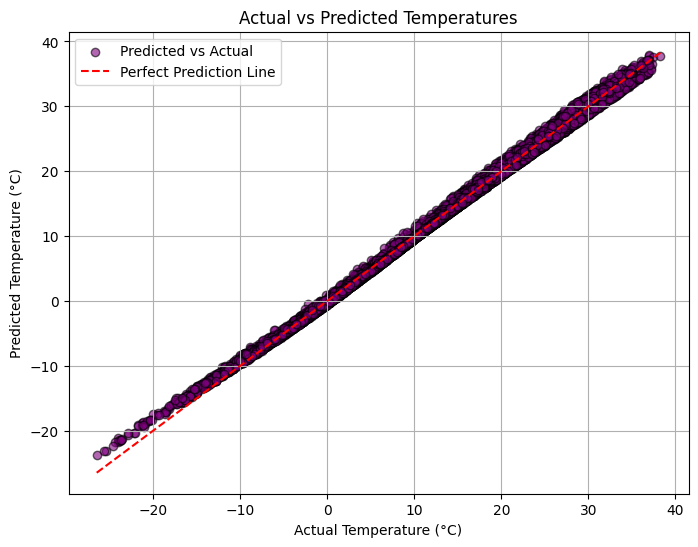

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# MODEL DEPLOYMENT

In [33]:
# Save model
joblib.dump(model, 'temperature_model.joblib')
print("Model saved as 'temperature_model.joblib'")

Model saved as 'temperature_model.joblib'


In [34]:
#import required libraries

import joblib
import numpy as np

In [35]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00


In [36]:

# Assume your trained model is called 'model'
joblib.dump(model, "temperature_model.joblib")

['temperature_model.joblib']

In [37]:
import gradio as gr


In [38]:

# Load trained model
model = joblib.load('temperature_model.joblib')


In [39]:

# Define the prediction function
def predict_temperature(rh, dp, at, p, ws):
    input_data = np.array([[rh, dp, at, p, ws]])
    prediction = model.predict(input_data)[0]
    return f"🌡️ Predicted Temperature: {prediction:.2f} °C"

# Example inputs for quick testing
examples = [
    [60, 15, 18, 1013, 3],
    [80, 20, 22, 1008, 5],
    [50, 12, 14, 1015, 2]
]

# Create Gradio interface with custom theme and colors
with gr.Blocks(theme=gr.themes.Soft(primary_hue="purple", secondary_hue="pink")) as demo:
    gr.Markdown(
        """
        # 🌞 **Temperature Predictor Dashboard**
        Welcome! Input environmental data to predict the **temperature** with our trained model.
        """
    )

    with gr.Row():
        rh = gr.Number(label="Relative Humidity (%)", value=60)
        dp = gr.Number(label="Dew Point (°C)", value=15)

    with gr.Row():
        at = gr.Number(label="Apparent Temperature (°C)", value=18)
        p = gr.Number(label="Pressure MSL (hPa)", value=1013)
        ws = gr.Number(label="Wind Speed (m/s)", value=3)

    predict_btn = gr.Button("🔍 Predict Temperature", variant="primary")
    output = gr.Textbox(label="Result", interactive=False)

    # Action on button click
    predict_btn.click(fn=predict_temperature,
                      inputs=[rh, dp, at, p, ws],
                      outputs=output)

    gr.Examples(examples, inputs=[rh, dp, at, p, ws])

# Launch the app with shareable link
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://79552927f752c703f3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
